In [128]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_singlenode
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'
fs_=16
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc('xtick', labelsize=fs_) 
matplotlib.rc('ytick', labelsize=fs_) 
plt.rc('legend',fontsize=fs_)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 600.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]
input = zero_control.copy()

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()
target = np.concatenate((np.concatenate( (wc.params["exc_init"], wc.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (wc.exc, wc.inh), axis=1)), axis=2)

peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
period = (peaks[-1] - peaks[-2])*dt
print("period = ", period)

period =  18.900000000000002


In [130]:
control_mat = np.zeros( (wc.params.N, len(wc.state_vars)) )
control_mat[0,0] = 1.
control_mat[0,1] = 1.

prec_mat = np.zeros( (wc.params.N, len(wc.output_vars)) )
prec_mat[0,0] = 1.
prec_mat[0,1] = 1.

int0, int1 = 1500, None
duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]

wc.params["duration"] = duration
wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

In [131]:
def plot_single(time, state, control, target, filename):

    fig, ax = plt.subplots(2,1)

    ax[0].plot(time, state[0,0,1:], color="red")
    ax[0].plot(time, state[0,1,1:], color="blue")
    ax[0].plot(time, target[0,0,1:], color="red", linestyle=':')
    ax[0].plot(time, target[0,1,1:], color="blue", linestyle=':')
    ax[0].set_xlim(0,300)

    ax[1].plot(time, control[0,0,1:], color="red")
    ax[1].plot(time, control[0,1,1:], color="blue")
    ax[1].set_xlim(0,300)

    if type(filename) != type(None):
        plt.savefig(filename)
    plt.show()

In [132]:
savepath = '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images' + os.sep

def plot(c_array, filename):

    fig, ax = plt.subplots(len(c_array),1, figsize=(10,24))

    for i in range(len(c_array)):
        ax[i].plot(wc_controlled.model.t, c_array[i][0,0,1:], color="red")
        ax[i].plot(wc_controlled.model.t, c_array[i][0,1,1:], color="blue")
        ax[i].set_ylim([-0.3,0.3])
        ax[i].set_title(str(np.round(i*2./(len(c_array)-1), 2))+ " * pi")
        if i != len(c_array)-1:
            ax[i].set_xticklabels([])

    plt.savefig(os.path.join(savepath, filename))
    plt.show()

In [92]:
control_array_w2_0 = []

For deterministic systems, parameters "M", "M_validation" and "validate_per_step" are not relevant.
If you want to study a noisy system, please set model parameter "sigma_ou" larger than zero
Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Cost in iteration 400: 0.0
Cost in iteration 600: 0.0
Cost in iteration 800: 0.0
Cost in iteration 1000: 0.0
Final cost : 0.0
shift =  0.0  * pi
For deterministic systems, parameters "M", "M_validation" and "validate_per_step" are not relevant.
If you want to study a noisy system, please set model parameter "sigma_ou" larger than zero
Compute control for a deterministic syst

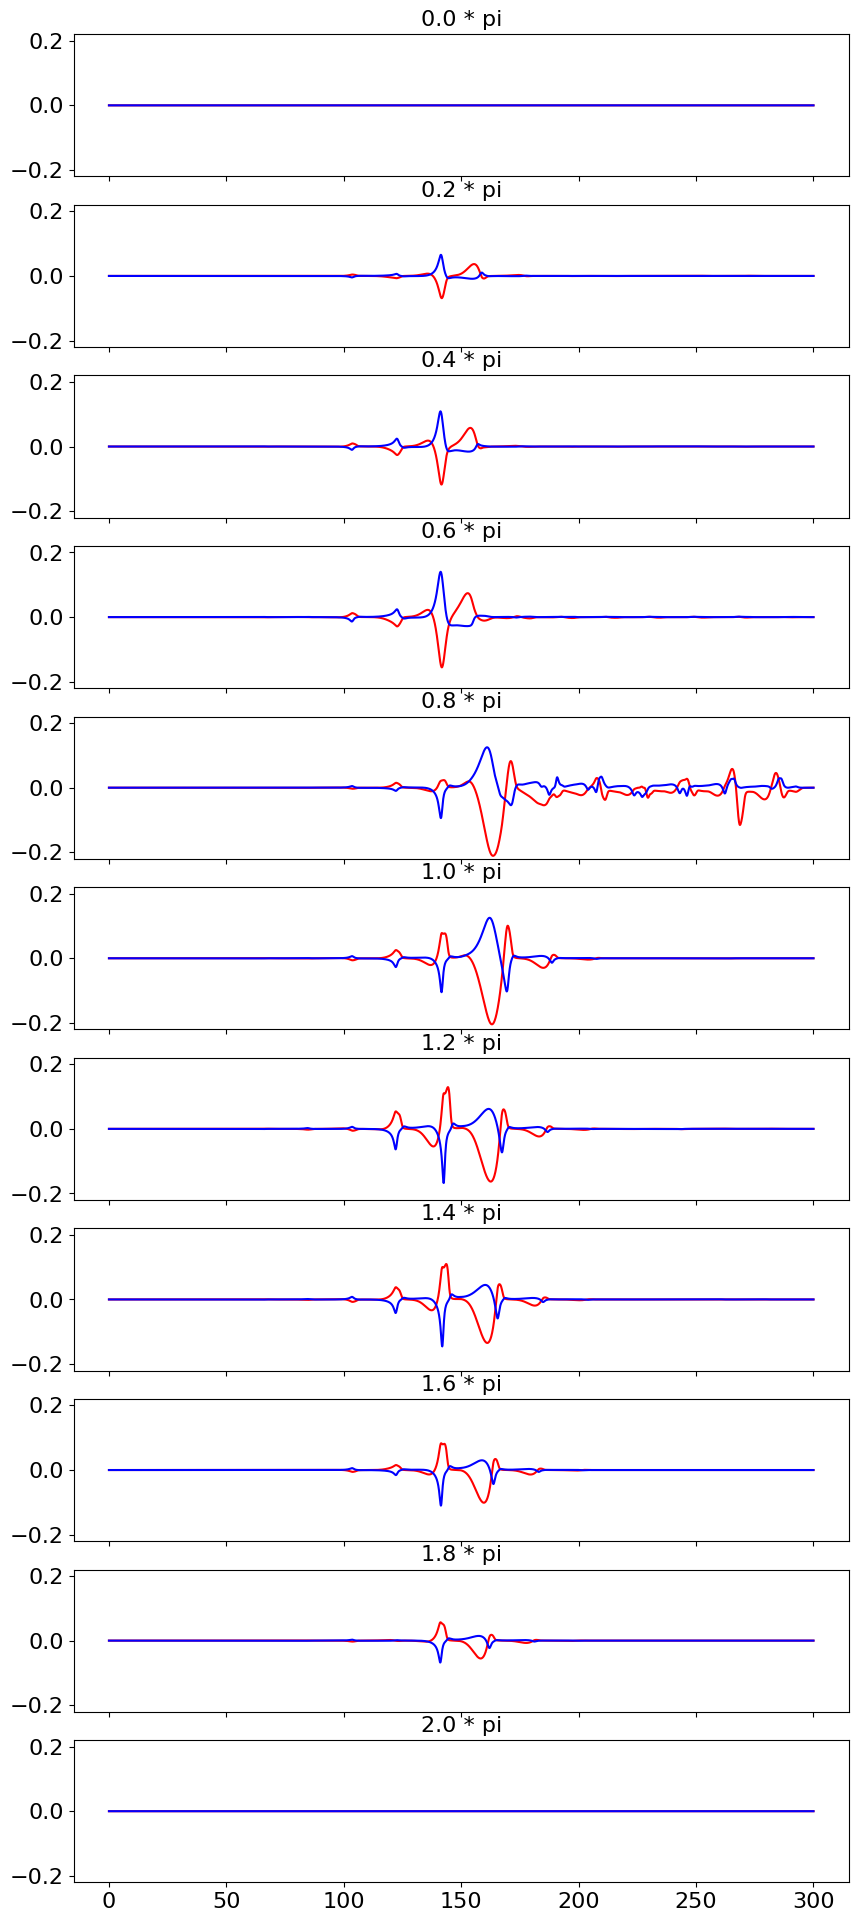

In [93]:
w2 = 1e0

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 11, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=w2, print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(200)


    wc_controlled.step = 1e-2
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(1000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    print("shift = ", period_shift/np.pi , " * pi")

    #fname = "phase_shift_" + str(round(period_shift/np.pi,1)) + ".png"

    #plot_single(wc_controlled.model.t, state, control, fname)
    control_array_w2_0.append(control)

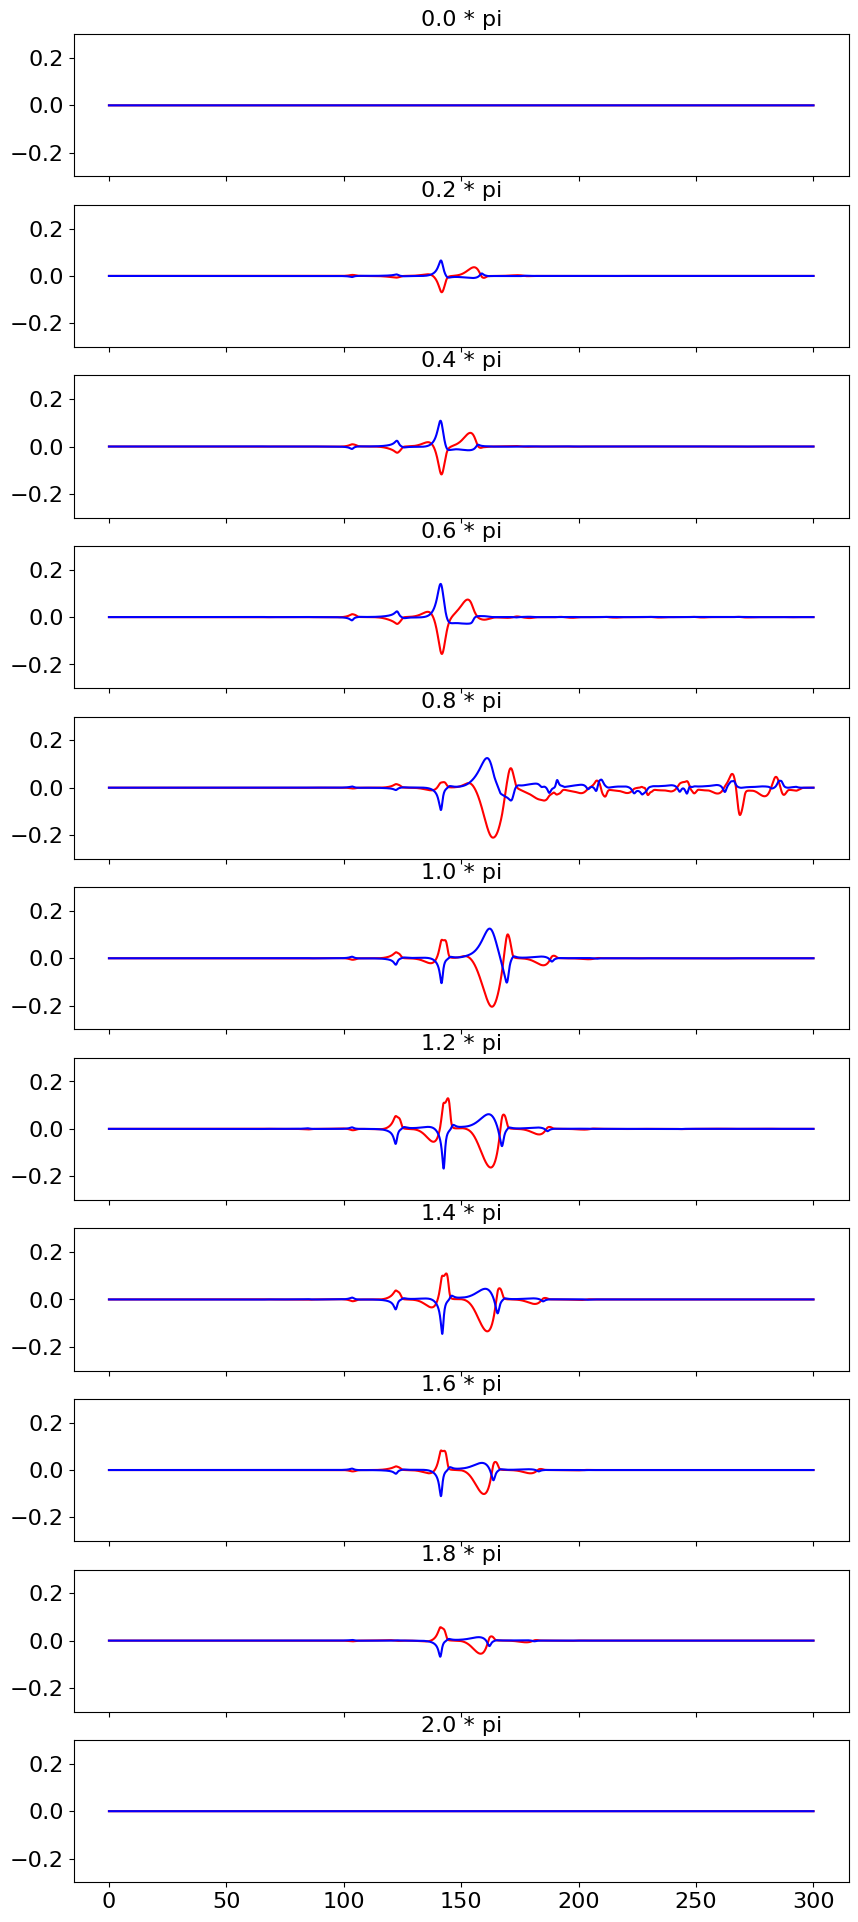

In [97]:
plot(control_array_w2_0, "phase_shift_w2_0.png")

In [143]:
control_array_w1 = []

w1 = 1e-2

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 11, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=0., w_1=w1, print_array=np.arange(0,2001,500), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(1)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w1.append(control)
        continue

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(100)

    wc_controlled.step = 1e-4
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(2000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w1.append(control)

Compute control for a deterministic system
Cost in iteration 0: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.8296772107719207
Final cost : 0.8077942491825791
Compute control for a deterministic system
Cost in iteration 0: 0.8077942491825791
Final cost : 0.010511794204820788
Compute control for a deterministic system
Cost in iteration 0: 0.010511794204820788
Cost in iteration 500: 0.010510339763534143
Cost in iteration 1000: 0.010510339763534143
Cost in iteration 1500: 0.010510339763534143
Cost in iteration 2000: 0.010510339763534143
Final cost : 0.010510339763534143
Compute control for a deterministic system
Cost in iteration 0: 2.3230079801886268
Final cost : 2.308577441644121
Compute control for a deterministic system
Cost in iteration 0: 2.308577441644121
Final cost : 0.03478435454447855
Compute control for a deterministic system
Cost in iteration 0: 0.03478435454447855
Cost in iteration 500: 0.034283530530996344
Cost in iteration 1000: 0.03

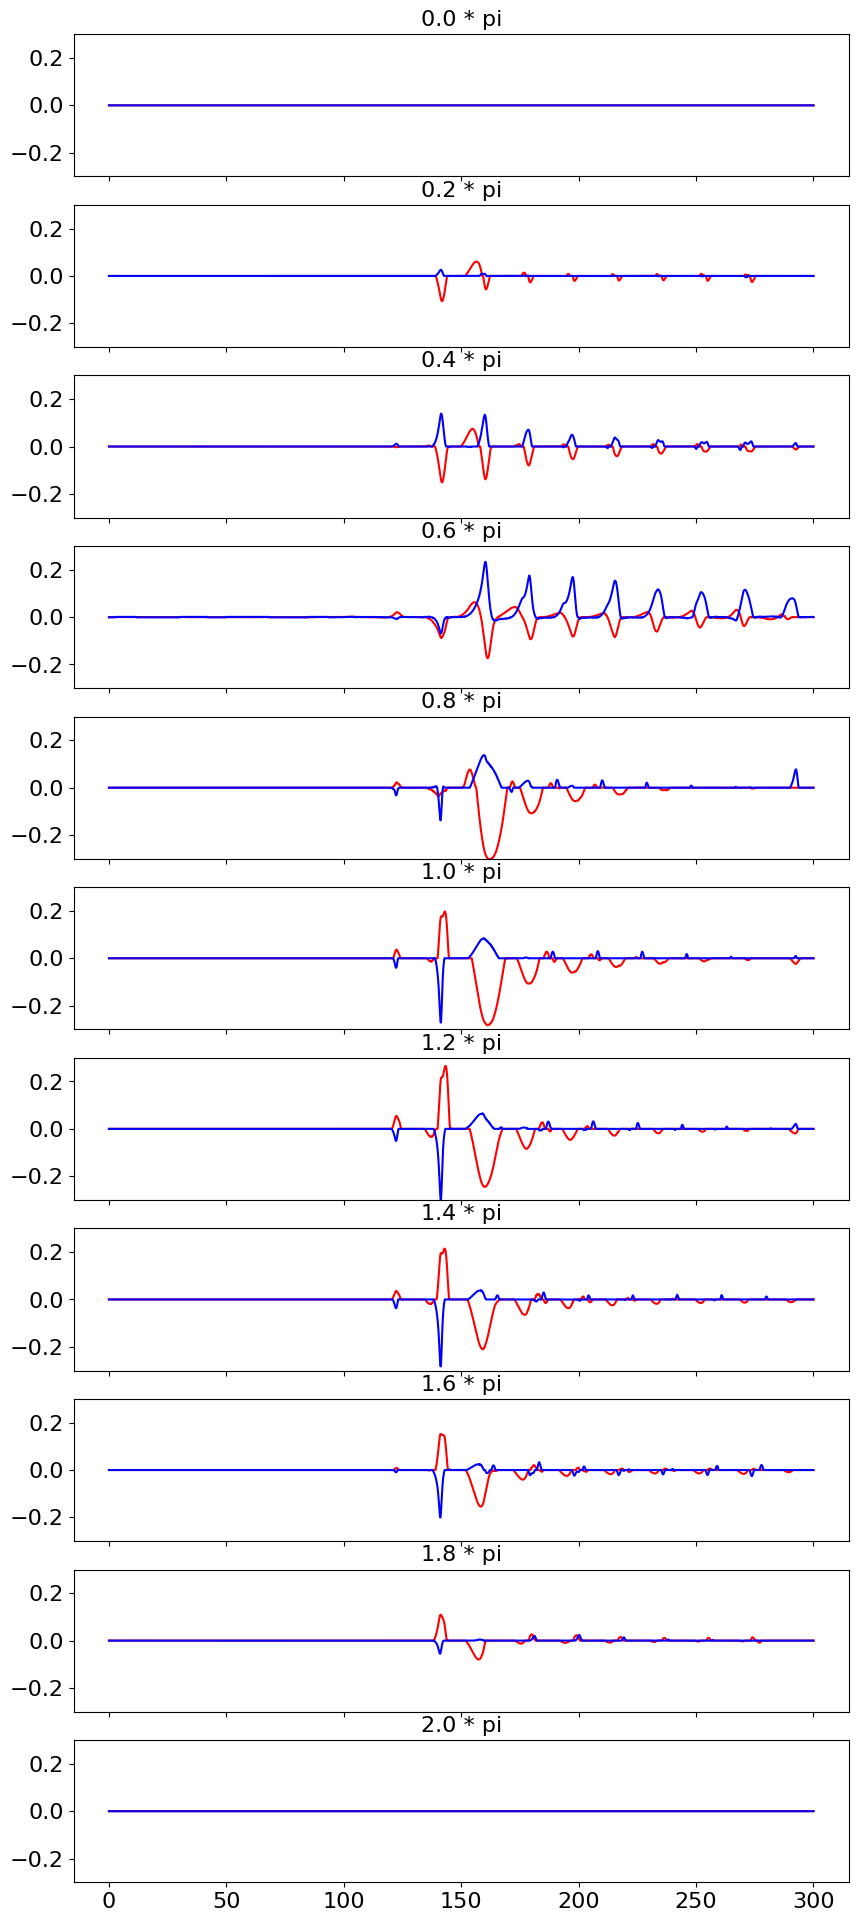

In [144]:
plot(control_array_w1, "phase_shift_w1_-2.png")

In [160]:
control_array_w1T = []

w1T = 1e-1

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 11, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]
    print("----------------------------")

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=0., w_1T=w1T, print_array=np.arange(0,1001,500), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(1)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w1T.append(control)
        continue

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(100)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(100)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(2000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w1T.append(control)

----------------------------
Compute control for a deterministic system
Cost in iteration 0: 0.0
Final cost : 0.0
----------------------------
Compute control for a deterministic system
Cost in iteration 0: 0.8296772107719207
Final cost : 0.8078486324684472
Compute control for a deterministic system
Cost in iteration 0: 0.8078486324684472
Final cost : 0.021047847616530807
Compute control for a deterministic system
Cost in iteration 0: 0.021047847616530807
Final cost : 0.021043926114993283
Compute control for a deterministic system
Cost in iteration 0: 0.021043926114993283
Converged in iteration 18 with cost 0.02104392145350615
Final cost : 0.02104392145350615
----------------------------
Compute control for a deterministic system
Cost in iteration 0: 2.3230079801886268
Final cost : 2.3086656461083677
Compute control for a deterministic system
Cost in iteration 0: 2.3086656461083677
Final cost : 0.03756975459627854
Compute control for a deterministic system
Cost in iteration 0: 0.037569

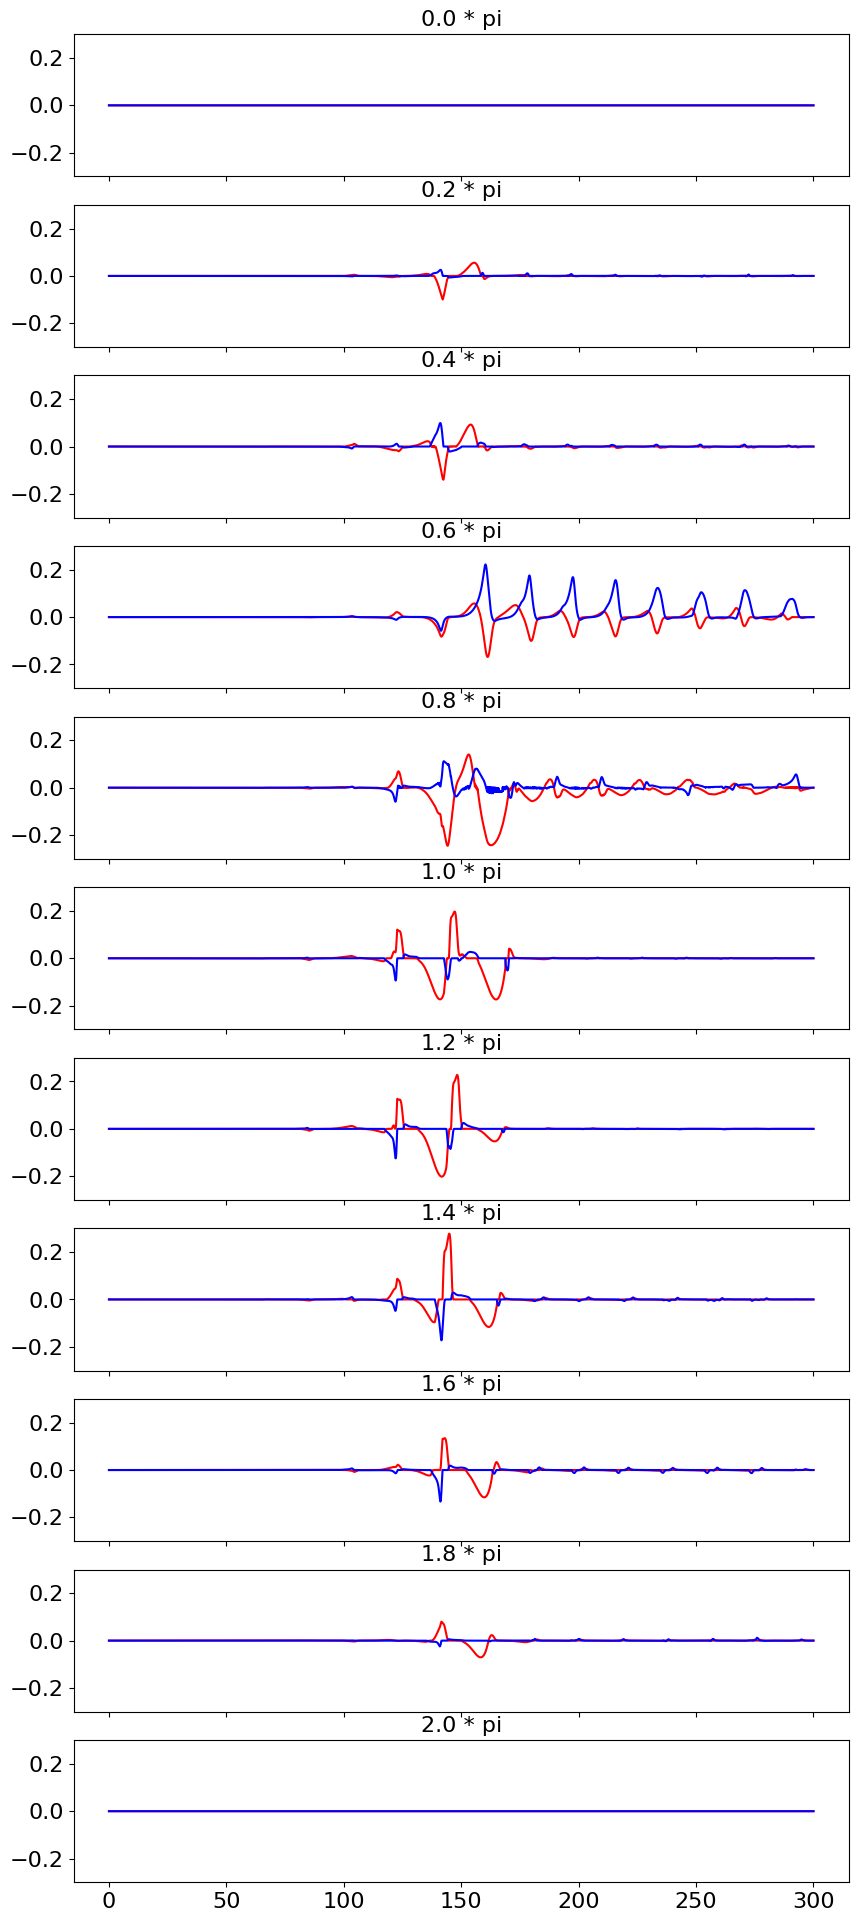

In [162]:
plot(control_array_w1T, "phase_shift_w1T_-1.png")

In [155]:
control_array_w1D = []

w1D = 1e-1

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 11, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=0., w_1D=w1D, print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(1)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w1D.append(control)
        continue

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(100)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(20)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(2000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w1D.append(control)

Compute control for a deterministic system
Cost in iteration 0: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.8296772107719207
Final cost : 0.8078615765405245
Compute control for a deterministic system
Cost in iteration 0: 0.8078615765405245
Final cost : 0.025548278327751615
Compute control for a deterministic system
Cost in iteration 0: 0.025548278327751615
Converged in iteration 9 with cost 0.02448229390739976
Final cost : 0.02448229390739976
Compute control for a deterministic system
Cost in iteration 0: 0.02448229390739976
Converged in iteration 2 with cost 0.02448229390739976
Final cost : 0.02448229390739976
Compute control for a deterministic system
Cost in iteration 0: 2.3230079801886268
Final cost : 2.3086704911623617
Compute control for a deterministic system
Cost in iteration 0: 2.3086704911623617
Final cost : 0.06574131375260671
Compute control for a deterministic system
Cost in iteration 0: 0.06574131375260671
Final cost : 0.05714419

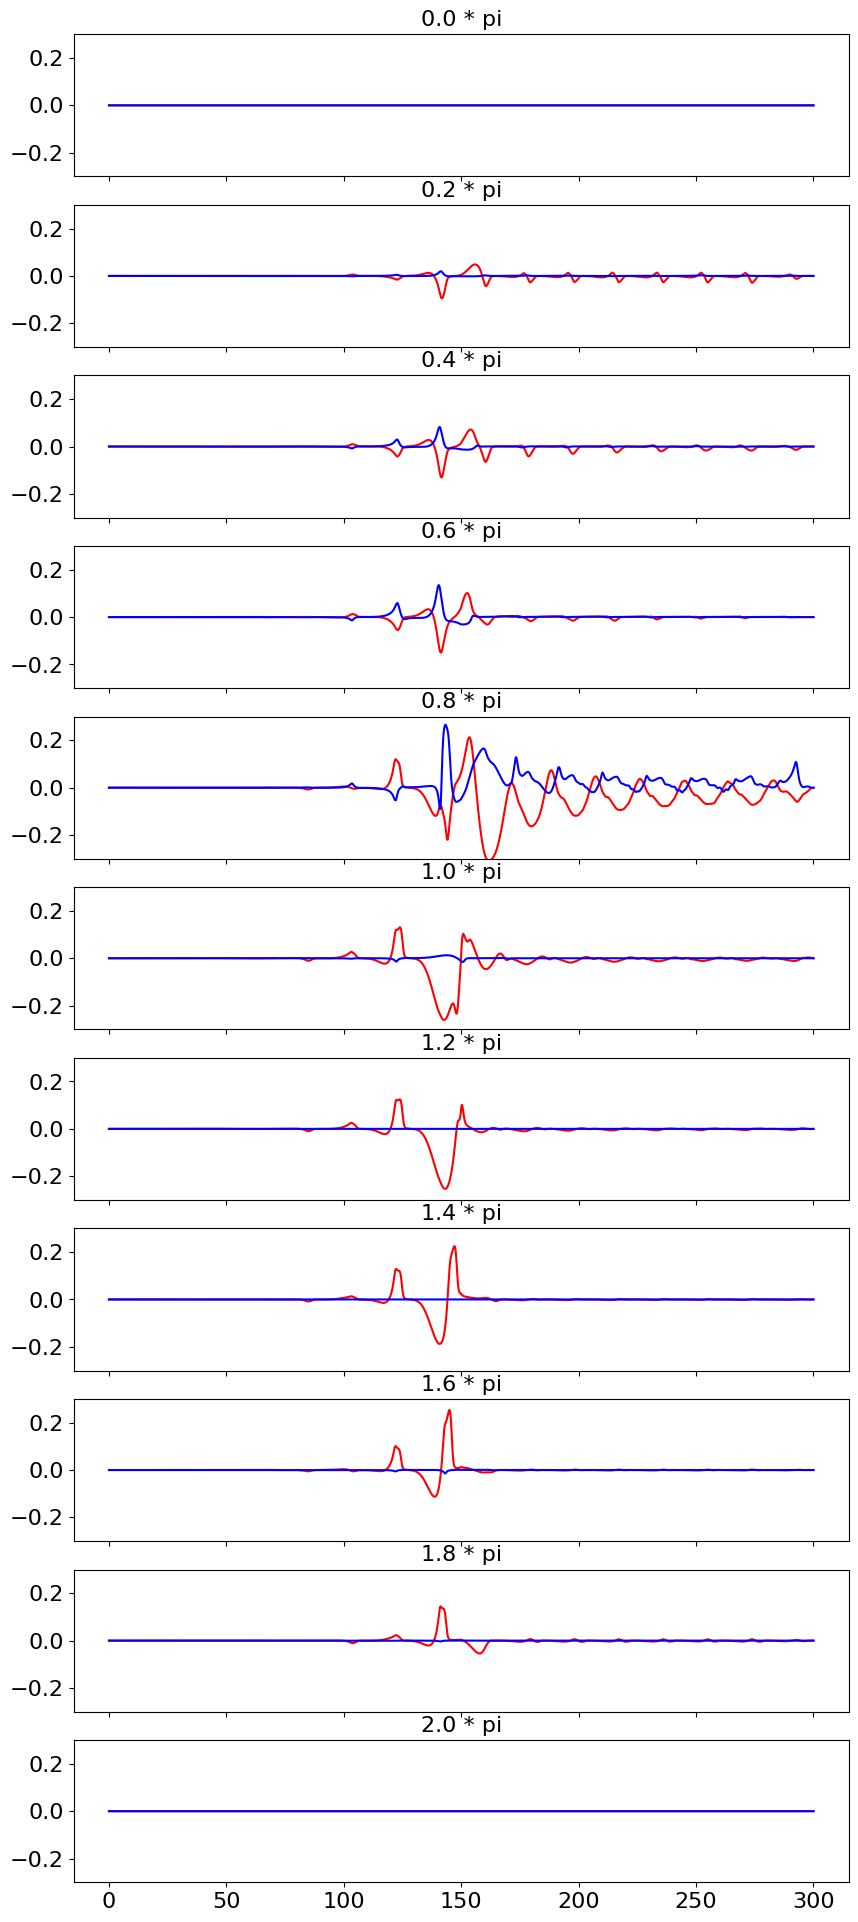

In [156]:
plot(control_array_w1D, "phase_shift_w1D_-1.png")

In [71]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.01
wc.params.dt = dt

duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]
input = zero_control.copy()

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()
de = 1e3

peaks0 = scipy.signal.find_peaks(wc.exc[0,:])[0]
print(peaks0)
period = (peaks0[-1] - peaks0[-2])*dt
print("period = ", period)

i0, i1 = 0, 0
for i in range(len(peaks0)):
    if peaks0[i] > 100/dt:
        i0 = peaks0[i]
        i1 = peaks0[i+1]
        break

ind_range = range(i0, i1+1,1)
shift_ep = np.zeros((len(ind_range)))
shift_em = np.zeros((len(ind_range)))
shift_ip = np.zeros((len(ind_range)))
shift_im = np.zeros((len(ind_range)))

for i in range(len(ind_range)):
    t = ind_range[i]

    wc.params.exc_ext[0,t] += de
    wc.run()
    wc.params.exc_ext[0,t] -= de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_ep[i] = (peaks[-1] - peaks0[-1])*dt/period/de

    wc.params.exc_ext[0,t] += -de
    wc.run()
    wc.params.exc_ext[0,t] -= -de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_em[i] = (peaks[-1] - peaks0[-1])*dt/period/de

    wc.params.inh_ext[0,t] += de
    wc.run()
    wc.params.inh_ext[0,t] -= de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_ip[i] = (peaks[-1] - peaks0[-1])*dt/period/de

    wc.params.inh_ext[0,t] += -de
    wc.run()
    wc.params.inh_ext[0,t] -= -de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_im[i] = (peaks[-1] - peaks0[-1])*dt/period/de

[ 1079  2916  4761  6606  8452 10297 12142 13988 15833 17678 19524 21369
 23214 25060 26905 28751]
period =  18.46


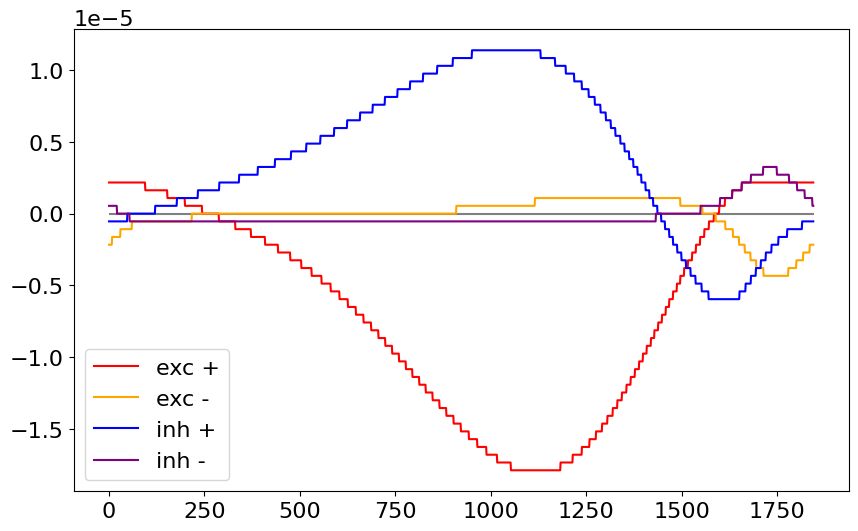

In [74]:
plt.plot(range(0,len(ind_range)), shift_ep, color="red", label="exc +")
plt.plot(range(0,len(ind_range)), shift_em, color="orange", label="exc -")
plt.plot(range(0,len(ind_range)), shift_ip, color="blue", label="inh +")
plt.plot(range(0,len(ind_range)), shift_im, color="purple", label="inh -")

plt.hlines(0., 0,len(ind_range), color="grey")
plt.legend(loc="lower left")
plt.show()